<a href="https://colab.research.google.com/github/ZosoV/aco_random_walk/blob/main/notebooks/display_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Display Results

In this notebook, you can find some results of our work

In [2]:
COLAB_ENV = False

if COLAB_ENV:
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd /content/gdrive/MyDrive/Proyectos/aco_random_walk/
else:
    %cd /home/zosov/ACO_Random_Walk

/home/zosov/ACO_Random_Walk


In [6]:
!ls stuff/results/aco_pp

histories_params_p  histories_params_q_0  proximities  random_walks


In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import glob

In [247]:
RESULTS_DIR = "stuff/results/aco_pp"
SAVE_DIR = "stuff/results/plots"

In [341]:
#@title Handy Functions    
def plot_many_distances(list_distances, legend_labels, 
                        legend_title = "var params",  title = "", 
                        save = False , name2save = "default",
                        ylim = None):

  list_iterations = np.arange(0, len(list_distances[0]))

  title = 'Average Distance vs Iterations \n' + title
  figure(figsize=(6, 5))#, dpi=80)
  plt.title(title)
  
  for label, distances in zip(legend_labels, list_distances):
    print(f"min dist: {np.amin(distances)}")
    plt.plot(list_iterations, distances, "-", label = str(label))

  plt.legend(title=legend_title)
  if ylim is not None:
    plt.ylim(ylim[0], ylim[1])
  if save: plt.savefig(os.path.join(SAVE_DIR,name2save + ".eps"), format='eps')

  plt.show()
  plt.close()
    
#@title Handy Functions    
def plot_many_distances_ax(ax, list_distances, legend_labels, 
                        legend_title = "var params",  title = "",
                        set_ylabel = None,
                        set_xlabel = None,
                        ylim = None,
                        disable_y_tick = False):

  list_iterations = np.arange(0, len(list_distances[0]))

  title = r'Average Distance $\langle x \rangle$ vs Iterations'+' \n' + title
  #figure(figsize=(6, 5))#, dpi=80)
  ax.set_title(title)
  
  for label, distances in zip(legend_labels, list_distances):
    print(f"min dist: {np.amin(distances)}")
    ax.plot(list_iterations, distances, "-", label = str(label))
  
  if set_ylabel is not None:
      ax.set_ylabel(set_ylabel, rotation=0)
  if set_xlabel is not None:
      ax.set_xlabel(set_xlabel)
  if disable_y_tick:
      ax.set_yticks([])
        
  ax.legend(title=legend_title)
  if ylim is not None:
    ax.set_ylim(ylim[0], ylim[1])

    

## Plot the variation of evaporation

In this experiment, we varied the $\rho$ parameter and proximity. 

In [297]:
# plot histories_params_p
MAX_ITER = 50

list_distances1 = []
legend_labels1 = []
stack_list = []
h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, "histories_params_p")
histories_names = sorted(glob.glob(res_dir + "/*"))

filename = os.path.basename(histories_names[0])
text_title1 = "size: {} ".format(filename.split("_")[1])
text_title1 += "ants: {} ".format(filename.split("_")[2])
text_title1 += r"$\alpha$: {} ".format(filename.split("_")[4])
text_title1 += r"$\beta$: {} ".format(filename.split("_")[5])
text_title1 += r"$q_0$: {} ".format(filename.split("_")[9])
text_title1 += r"$\lambda$: {} ".format(filename.split("_")[10])

for i, h_name in enumerate(histories_names):
    history = np.load(h_name, allow_pickle='TRUE').item()
    h_name = os.path.basename(h_name)
    stack_list.append(history['distances_avg'][h_range])
    if (i + 1) % 3 == 0 and i != 0:
        legend_labels1.append(r"$\rho$: {} prox: {}".format(
            h_name.split("_")[6],
            h_name.split("_")[12]
        ))
        list_distances1.append(np.stack(stack_list).mean(axis = 0))
        stack_list = []

legend_labels1

['$\\rho$: 0.3 prox: 1',
 '$\\rho$: 0.3 prox: 2',
 '$\\rho$: 0.5 prox: 1',
 '$\\rho$: 0.5 prox: 2',
 '$\\rho$: 0.7 prox: 1',
 '$\\rho$: 0.7 prox: 2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 117.46666666666668
min dist: 116.86666666666667
min dist: 118.33333333333333
min dist: 116.2


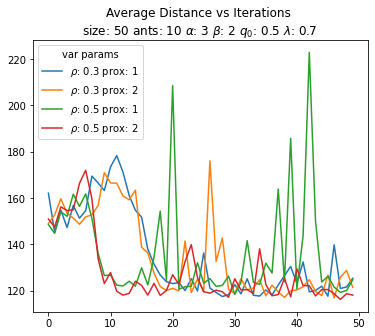

In [298]:
plot_many_distances(list_distances1[0:4], legend_labels1[0:4],  title = text_title1, save = True, name2save = "params_p") #, ylim = (100,350))

## Plot the variation of $q_0$

In this experiment, we varied the $q_0$ parameter and proximity. 

In [295]:
MAX_ITER = 50

list_distances2 = []
legend_labels2 = []
stack_list = []
h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, "histories_params_q_0")
histories_names = sorted(glob.glob(res_dir + "/*"))

filename = os.path.basename(histories_names[0])
text_title2 = "size: {} ".format(filename.split("_")[1])
text_title2 += "ants: {} ".format(filename.split("_")[2])
text_title2 += r"$\alpha$: {} ".format(filename.split("_")[4])
text_title2 += r"$\beta$: {} ".format(filename.split("_")[5])
text_title2 += r"$\rho$: {} ".format(filename.split("_")[6])
text_title2 += r"$\lambda$: {} ".format(filename.split("_")[10])

for i, h_name in enumerate(histories_names):
    history = np.load(h_name, allow_pickle='TRUE').item()
    h_name = os.path.basename(h_name)
    stack_list.append(history['distances_avg'][h_range])
    if (i + 1) % 3 == 0 and i != 0:
        legend_labels2.append(r"$q_0$: {} prox: {}".format(
            h_name.split("_")[9],
            h_name.split("_")[12]
        ))
        list_distances2.append(np.stack(stack_list).mean(axis = 0))
        stack_list = []

legend_labels2

['$q_0$: 0.3 prox: 1',
 '$q_0$: 0.3 prox: 2',
 '$q_0$: 0.5 prox: 1',
 '$q_0$: 0.5 prox: 2',
 '$q_0$: 0.7 prox: 1',
 '$q_0$: 0.7 prox: 2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 127.86666666666667
min dist: 136.6
min dist: 111.73333333333335
min dist: 112.33333333333333
min dist: 103.06666666666666
min dist: 103.53333333333332


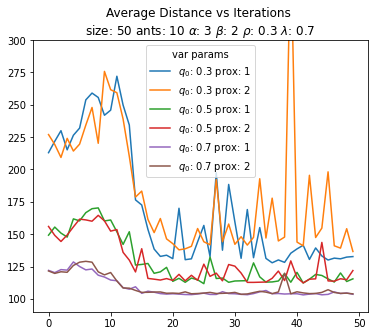

In [296]:
plot_many_distances(list_distances2, legend_labels2,  title = text_title2, ylim=(90,300), save = True, name2save = "params_q_0")

## Plot the variation of penalty

In this experiment, we varied the $\lambda$ parameter and proximity. 

In [293]:
MAX_ITER = 50

list_distances3 = []
legend_labels3 = []
stack_list = []
h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, "histories_params_penalty")
histories_names = sorted(glob.glob(res_dir + "/*"))

filename = os.path.basename(histories_names[0])
text_title3 = "size: {} ".format(filename.split("_")[1])
text_title3 += "ants: {} ".format(filename.split("_")[2])
text_title3 += r"$\alpha$: {} ".format(filename.split("_")[4])
text_title3 += r"$\beta$: {} ".format(filename.split("_")[5])
text_title3 += r"$\rho$: {} ".format(filename.split("_")[6])
text_title3 += r"$q_0$: {} ".format(filename.split("_")[9])

for i, h_name in enumerate(histories_names):
    history = np.load(h_name, allow_pickle='TRUE').item()
    h_name = os.path.basename(h_name)
    stack_list.append(history['distances_avg'][h_range])
    if (i + 1) % 3 == 0 and i != 0:
        legend_labels3.append(r"$\lambda$: {} prox: {}".format(
            h_name.split("_")[10],
            h_name.split("_")[12]
        ))
        list_distances3.append(np.stack(stack_list).mean(axis = 0))
        stack_list = []

legend_labels3

['$\\lambda$: 0.3 prox: 1',
 '$\\lambda$: 0.3 prox: 2',
 '$\\lambda$: 0.5 prox: 1',
 '$\\lambda$: 0.5 prox: 2',
 '$\\lambda$: 0.7 prox: 1',
 '$\\lambda$: 0.7 prox: 2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 124.66666666666667
min dist: 125.73333333333333
min dist: 111.53333333333335
min dist: 112.93333333333334
min dist: 102.0
min dist: 104.53333333333335


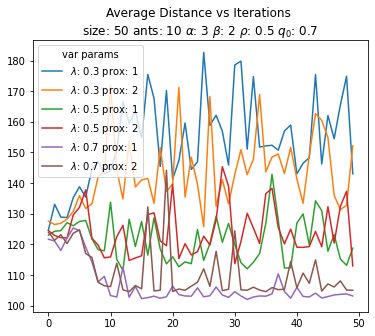

In [294]:
plot_many_distances(list_distances3, legend_labels3,  title = text_title3, save = True, name2save = "params_penalty")

min dist: 117.46666666666668
min dist: 116.86666666666667
min dist: 118.33333333333333
min dist: 116.2
min dist: 127.86666666666667
min dist: 136.6
min dist: 111.73333333333335
min dist: 112.33333333333333
min dist: 103.06666666666666
min dist: 103.53333333333332
min dist: 124.66666666666667
min dist: 125.73333333333333
min dist: 111.53333333333335
min dist: 112.93333333333334
min dist: 102.0
min dist: 104.53333333333335


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


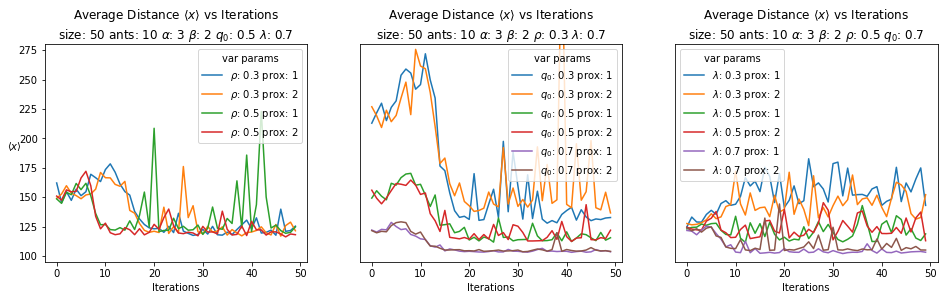

In [342]:

fig, ax = plt.subplots(figsize=(16,4))#, dpi=50)

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

plot_many_distances_ax(ax1,list_distances1[0:4], legend_labels1[0:4],  title = text_title1, ylim = (95,280), set_ylabel = r"$\langle x \rangle$", set_xlabel = "Iterations")
plot_many_distances_ax(ax2,list_distances2, legend_labels2,  title = text_title2, ylim = (95,280), set_xlabel = "Iterations", disable_y_tick = True)
plot_many_distances_ax(ax3,list_distances3, legend_labels3,  title = text_title3,  ylim = (95,280), set_xlabel = "Iterations", disable_y_tick = True)

plt.savefig(os.path.join(SAVE_DIR,"params_selection" + ".eps"), bbox_inches='tight', format='eps')